In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [17]:
## 1 point
## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv('../data606/diabetes.csv')
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
y = diab_df['Outcome']
x = diab_df.drop(columns='Outcome')

In [19]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)

/Users/fionachang/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/fionachang/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)



{'w0': array(-8.40412575), 'w1': array(0.12318787), 'w2': array(0.03516206), 'w3': array(-0.01330116), 'w4': array(0.00062149), 'w5': array(-0.00119116), 'w6': array(0.08970142), 'w7': array(0.94517176), 'w8': array(0.01486771)}


In [13]:
'''
1. The intercept is w0 and the coefficents are w1,w2,w3,w4,w5,w6,w7,w8
2. Normal distribution.
3. Transform continuous value to range(0,1).
4. It is the optimized weight for the linear regression.
'''

'\n1.\n2. Normal distribution\n3. Transform continuous value to range(0,1)\n4. It is the \n'

<ipython-input-20-d61a8f60445a>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400, step=step, chains=1)
Only 400 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 1 chain for 1_000 tune and 400 draw iterations (1_000 + 400 draws total) took 2135 seconds.
/Users/fionachang/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:216: UserWarning: More chains (400) than draws (9). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Only one chain was sampled, this makes it impossible to run some convergence checks
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/fionachang/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w0'}>,
        <AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'w2'}>],
       [<AxesSubplot:title={'center':'w3'}>,
        <AxesSubplot:title={'center':'w4'}>,
        <AxesSubplot:title={'center':'w5'}>],
       [<AxesSubplot:title={'center':'w6'}>,
        <AxesSubplot:title={'center':'w7'}>,
        <AxesSubplot:title={'center':'w8'}>]], dtype=object)

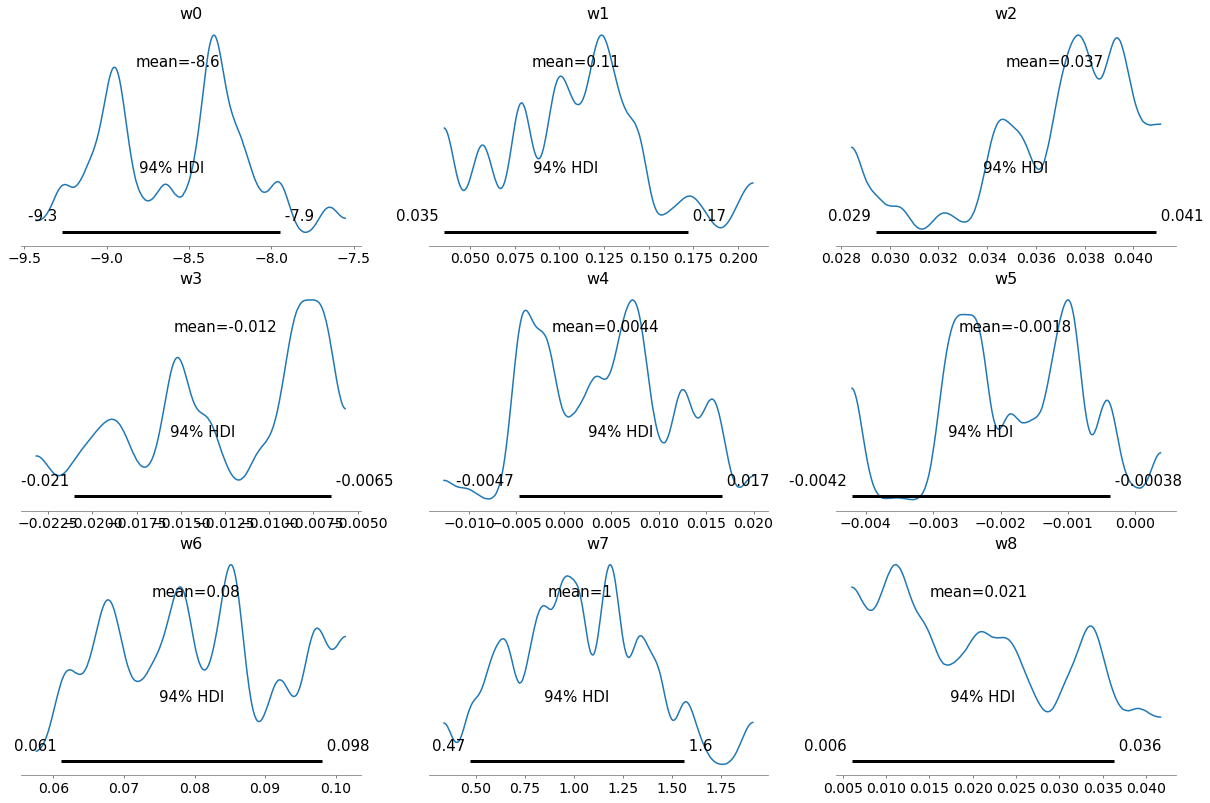

In [20]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    step = pm.Metropolis()
    trace = pm.sample(400, step=step, chains=1)

## Explain the output of the plot 
az.plot_posterior(trace)

In [21]:
'''
The output plots are the sample posterior densities of different weights.
'''

'\nThe output plots are the sample posterior densities of different weights.\n'